# Introduksjon til Hypotesetesting 📈

I denne Jupyter Notebook vil vi utforske grunnleggende hypotesetester:
1. **Z-test** 🧮
2. **T-test** 🔍
3. **P-verdier** 🎯

Vi starter med noen grunnleggende definisjoner og teori.


## Definisjon av Hypotesetesting

Hypotesetesting er en metode for å gjøre inferenser om en populasjonsparameter basert på statistikk samlet fra en data sample.


## Grunnleggende Teori og Distribusjoner

Før vi dykker inn i de spesifikke testene, må vi forstå noen nøkkelkonsepter som:
- Normalfordeling
- T-fordeling
- Standardfeil
- Kritiske verdier


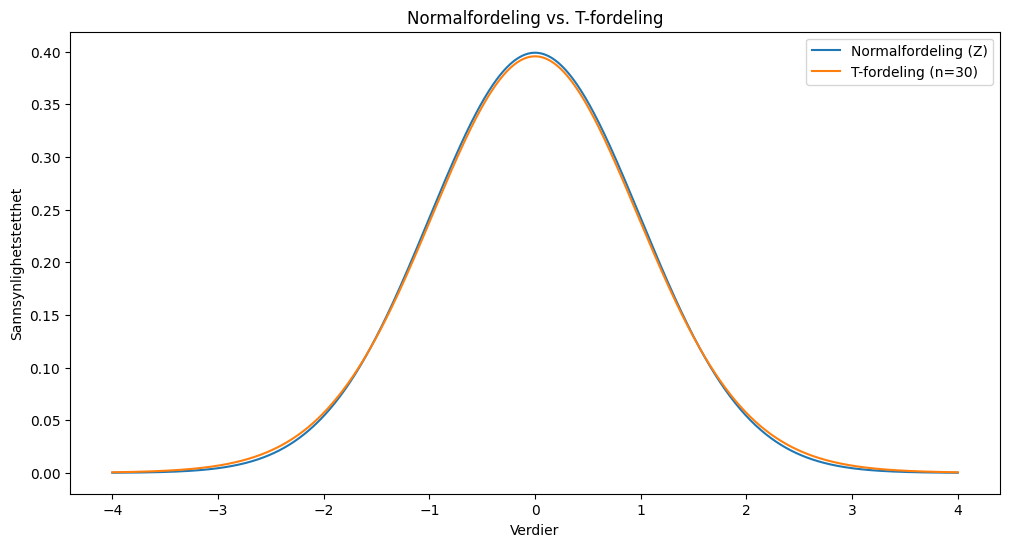

In [7]:
# Visualisering av Normalfordeling og T-fordeling
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

x = np.linspace(-4, 4, 1000)
plt.figure(figsize=(12, 6))
plt.plot(x, norm.pdf(x), label='Normalfordeling (Z)')
plt.plot(x, t.pdf(x, df=29), label='T-fordeling (n=30)')
plt.title('Normalfordeling vs. T-fordeling')
plt.xlabel('Verdier')
plt.ylabel('Sannsynlighetstetthet')
plt.legend()
plt.show()


## Observasjon: 
Som du kan se, har T-fordelingen tykkere haler, noe som indikerer en større variabilitet, spesielt relevant for små sample størrelser.


## Z-test: Når og Hvordan Bruke

Z-testen brukes når:
- Standardavviket i populasjonen er kjent.
- Utvalgsstørrelsen er stor (typisk n > 30).
- Data antas å være normalfordelt (eller n er stor nok til at sentralgrenseteoremet gjelder).


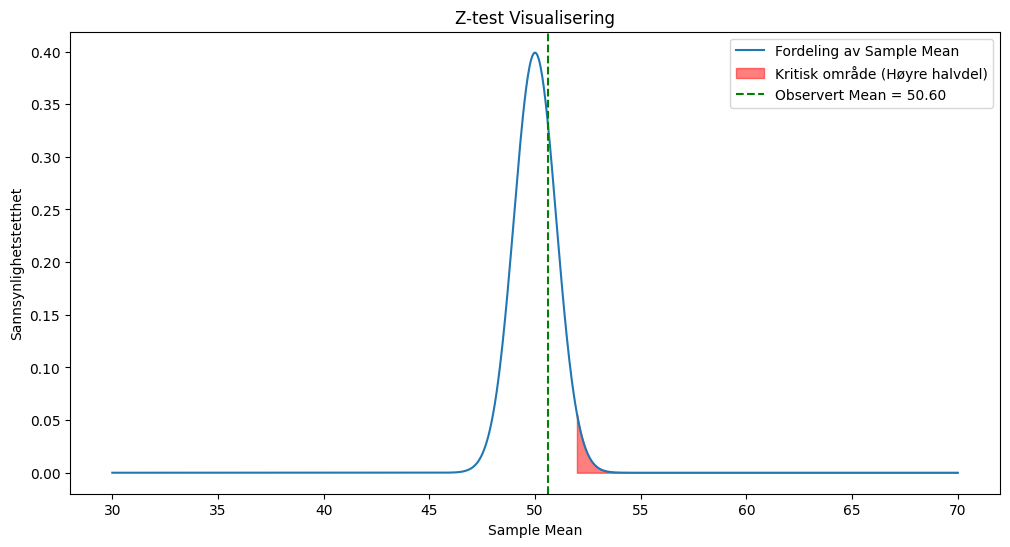

In [8]:
# Eksempeldata for Z-test
np.random.seed(0)
sample_size = 100
data_normal = np.random.normal(loc=50, scale=10, size=sample_size)

# Beregning av Z-score
sample_mean = np.mean(data_normal)
population_mean = 50
population_std = 10
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
z_critical = norm.ppf(0.975)  # 95% konfidens

# Plotting for Z-test
plt.figure(figsize=(12, 6))
x = np.linspace(30, 70, 1000)
plt.plot(x, norm.pdf(x, population_mean, population_std/np.sqrt(sample_size)), label='Fordeling av Sample Mean')
plt.fill_between(x, norm.pdf(x, population_mean, population_std/np.sqrt(sample_size)), where=(x > norm.ppf(0.975, loc=population_mean, scale=population_std/np.sqrt(sample_size))), color='red', alpha=0.5, label='Kritisk område (Høyre halvdel)')
plt.axvline(sample_mean, color='green', linestyle='dashed', label=f'Observert Mean = {sample_mean:.2f}')
plt.title('Z-test Visualisering')
plt.xlabel('Sample Mean')
plt.ylabel('Sannsynlighetstetthet')
plt.legend()
plt.show()


## Observasjon:
Her ser vi at om den observerte meanen faller inn i det røde området, ville vi forkastet nullhypotesen om at sample meanen er lik populasjonsmeanen under nivået av signifikans (α = 0.05).


## T-test: Når og Hvordan Bruke

T-testen brukes når:
- Standardavviket i populasjonen er ukjent.
- Utvalgsstørrelsen er liten.
- Det er rimelig å anta at dataene er normalfordelt.


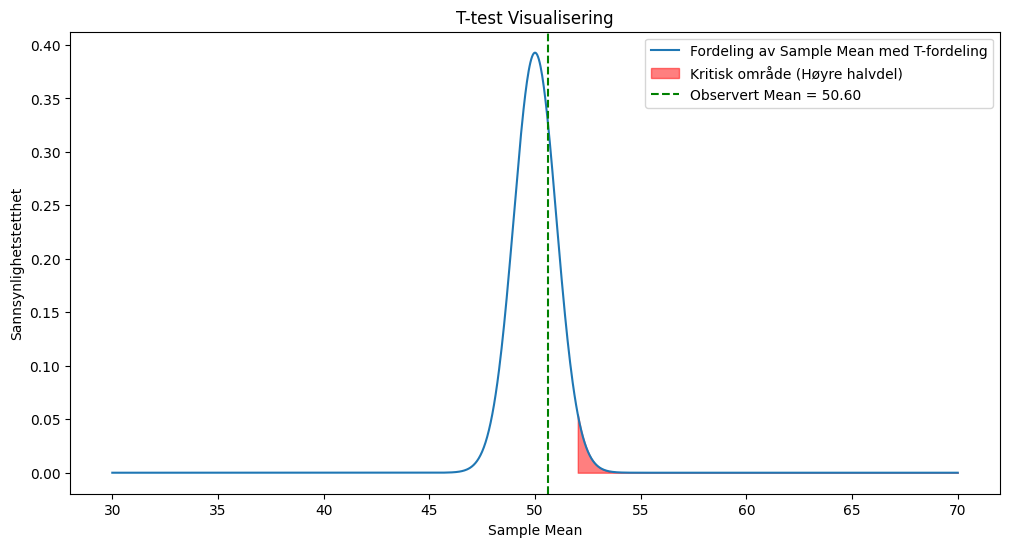

In [10]:
from scipy.stats import ttest_1samp

# T-test med samme data som for Z-test, men antar ukjent populasjonsstandardavvik
t_stat, p_value = ttest_1samp(data_normal, population_mean)

# Visualisering av T-test
plt.figure(figsize=(12, 6))
x = np.linspace(30, 70, 1000)
plt.plot(x, t.pdf(x, df=sample_size-1, loc=population_mean, scale=np.std(data_normal, ddof=1)/np.sqrt(sample_size)), label='Fordeling av Sample Mean med T-fordeling')
plt.fill_between(x, t.pdf(x, df=sample_size-1, loc=population_mean, scale=np.std(data_normal, ddof=1)/np.sqrt(sample_size)), where=(x > t.ppf(0.975, df=sample_size-1, loc=population_mean, scale=np.std(data_normal, ddof=1)/np.sqrt(sample_size))), color='red', alpha=0.5, label='Kritisk område (Høyre halvdel)')
plt.axvline(sample_mean, color='green', linestyle='dashed', label=f'Observert Mean = {sample_mean:.2f}')
plt.title('T-test Visualisering')
plt.xlabel('Sample Mean')
plt.ylabel('Sannsynlighetstetthet')
plt.legend()
plt.show()


## Observasjon:
Denne grafen viser at t-fordelingen brukes til å bestemme kritiske områder når standardavviket i populasjonen er ukjent, og gir bredere kritiske områder sammenlignet med z-fordelingen, reflekterende større usikkerhet.


## P-verdier og deres Rolle i Hypotesetesting

P-verdien måler den laveste signifikansgrensen der nullhypotesen kan avvises. Den forteller oss om sannsynligheten for å observere vår statistikk (eller noe mer ekstremt) gitt at nullhypotesen er sann.


## Konklusjon

Gjennom denne guiden har vi sett hvordan ulike hypotesetester fungerer og hvordan de visualiseres. Disse testene er essensielle for å trekke pålitelige konklusjoner fra data og for å forstå når og hvordan forskjellige tester brukes avhengig av situasjonen.


## Oppgave Eksempel: Hypotesetesting av Årslønn

Vi starter med å generere et tilfeldig datasett som simulerer lønnene for 40 ansatte med et kjent standardavvik på 50,000 NOK og en antatt gjennomsnittslønn på 500,000 NOK.


In [21]:
# Importerer nødvendige biblioteker
import numpy as np
from scipy.stats import norm, t
import matplotlib.pyplot as plt

# Setter seed for reproduserbarhet
np.random.seed(42)

# Genererer tilfeldig lønndata
sample_size = 40
true_mean = 500000
known_std_dev = 50000
sample_data = np.random.normal(loc=true_mean, scale=known_std_dev, size=sample_size)

# Beregner sample gjennomsnitt og standardavvik
sample_mean = np.mean(sample_data)
sample_std_dev = np.std(sample_data, ddof=1)  # ddof=1 for sample standard deviation


## Utfører Z-test

Vi bruker Z-test siden standardavviket er kjent. Vi vil teste om det er signifikante forskjeller fra populasjonsgjennomsnittet på 500,000 NOK.


In [22]:
# Z-test beregning
z_score = (sample_mean - true_mean) / (known_std_dev / np.sqrt(sample_size))
p_value_z = norm.sf(abs(z_score)) * 2  # tosidig p-verdi

# Viser Z-score og p-verdien
print(f"Z-score: {z_score:.2f}")
print(f"P-verdi for Z-test: {p_value_z:.4f}")


Z-score: -1.38
P-verdi for Z-test: 0.1667


## Visualisering av Resultatet fra Z-test


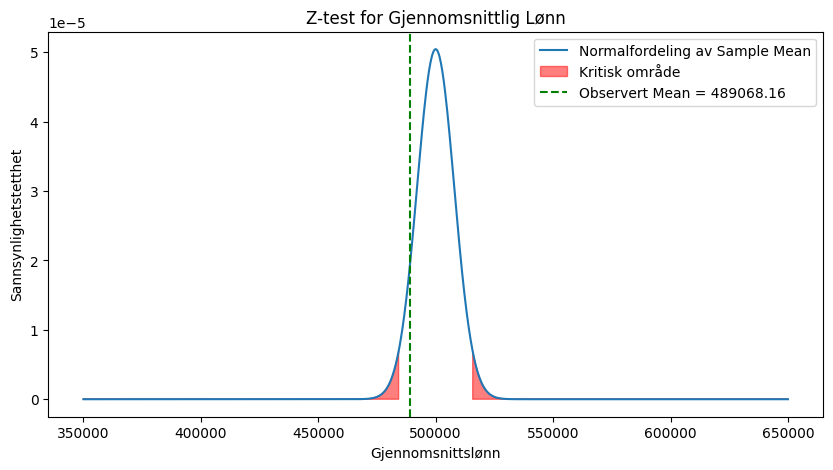

In [23]:
# Visualisering av Z-test
x = np.linspace(true_mean - 3*known_std_dev, true_mean + 3*known_std_dev, 1000)
y = norm.pdf(x, true_mean, known_std_dev / np.sqrt(sample_size))
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Normalfordeling av Sample Mean')
plt.fill_between(x, y, where=(x < true_mean - norm.ppf(0.975)*known_std_dev/np.sqrt(sample_size)) | (x > true_mean + norm.ppf(0.975)*known_std_dev/np.sqrt(sample_size)), color='red', alpha=0.5, label='Kritisk område')
plt.axvline(sample_mean, color='green', linestyle='dashed', label=f'Observert Mean = {sample_mean:.2f}')
plt.title('Z-test for Gjennomsnittlig Lønn')
plt.xlabel('Gjennomsnittslønn')
plt.ylabel('Sannsynlighetstetthet')
plt.legend()
plt.show()


## Utfører T-test

Selv om standardavviket er kjent, vil vi også utføre en T-test for å se hvordan resultatene sammenligner, spesielt siden utvalgsstørrelsen er relativt liten.


In [24]:
# T-test beregning
t_stat, p_value_t = ttest_1samp(sample_data, true_mean)

# Viser T-statistikk og p-verdien
print(f"T-statistikk: {t_stat:.2f}")
print(f"P-verdi for T-test: {p_value_t:.4f}")


T-statistikk: -1.45
P-verdi for T-test: 0.1547


## Konklusjon

Vi har utført både en Z-test og en T-test for å undersøke hypotesen om at den gjennomsnittlige lønnen er 500,000 NOK. Resultatene fra begge testene gir oss innsikt i om vi kan forkaste nullhypotesen eller ikke, basert på det observerte datasettet.


## Oppgave: Stokastisk Simulering av Behandlingseffektivitet

I denne oppgaven skal vi bruke stokastisk simulering for å evaluere effektiviteten av en ny medisin sammenlignet med en standardbehandling. Gjennom simuleringen ønsker vi å estimere sannsynligheten for at den nye medisinen er mer effektiv enn standardbehandlingen, basert på resultatene fra en klinisk studie.

### Hypoteser
- **Nullhypotese (H0)**: Den nye medisinen og standardbehandlingen er like effektive.
- **Alternativ hypotese (H1)**: Den nye medisinen er mer effektiv enn standardbehandlingen.

Vi vil utføre 10,000 simuleringer av studien og bruke resultatene til å bestemme om vi skal forkaste nullhypotesen eller beholde den.


Sannsynlighet for at ny medisin er bedre: 0.9223


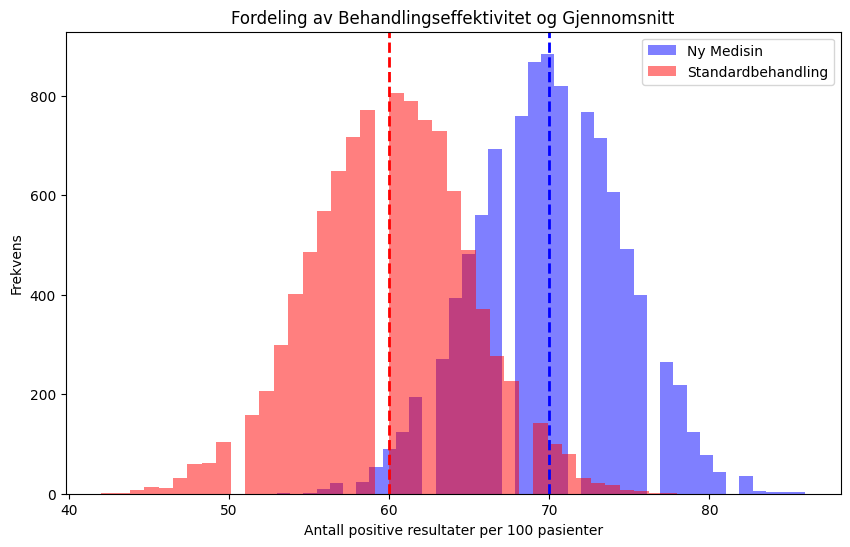

Gjennomsnittlig effektivitet for ny medisin: 70.02
Gjennomsnittlig effektivitet for standardbehandling: 59.99
Sannsynlighet for at ny medisin er bedre: 0.9223
Konklusjon: Vi beholder nullhypotesen. Det er ikke tilstrekkelig bevis for at den nye medisinen er bedre.


In [31]:
# Importerer nødvendige biblioteker
import numpy as np
import matplotlib.pyplot as plt

# Definisjon av observerte suksessrater
effektivitet_ny = 70  # 70 av 100 pasienter hadde positiv effekt med ny medisin
effektivitet_standard = 60  # 60 av 100 pasienter hadde positiv effekt med standardbehandling

# Antall simuleringer og lagring av resultater
n_simuleringer = 10000
resultater_ny = []
resultater_standard = []

for _ in range(n_simuleringer):
    ny = np.random.binomial(100, effektivitet_ny / 100)
    standard = np.random.binomial(100, effektivitet_standard / 100)
    resultater_ny.append(ny)
    resultater_standard.append(standard)

# Beregning av sannsynlighet for at ny medisin er bedre
antall_ny_better = sum(np.array(resultater_ny) > np.array(resultater_standard))
sannsynlighet_ny_better = antall_ny_better / n_simuleringer
print(f"Sannsynlighet for at ny medisin er bedre: {sannsynlighet_ny_better:.4f}")

# Visualisering
plt.figure(figsize=(10, 6))
plt.hist(resultater_ny, alpha=0.5, bins=40, color='blue', label='Ny Medisin')
plt.hist(resultater_standard, alpha=0.5, bins=40, color='red', label='Standardbehandling')
plt.axvline(np.mean(resultater_ny), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(resultater_standard), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Antall positive resultater per 100 pasienter')
plt.ylabel('Frekvens')
plt.title('Fordeling av Behandlingseffektivitet og Gjennomsnitt')
plt.legend()
plt.show()

print(f"Gjennomsnittlig effektivitet for ny medisin: {np.mean(resultater_ny):.2f}")
print(f"Gjennomsnittlig effektivitet for standardbehandling: {np.mean(resultater_standard):.2f}")

print(f"Sannsynlighet for at ny medisin er bedre: {sannsynlighet_ny_better:.4f}")

# Beslutning basert på sannsynligheten
if sannsynlighet_ny_better > 0.95:
    print("Konklusjon: Vi forkaster nullhypotesen. Den nye medisinen er statistisk signifikant bedre.")
else:
    print("Konklusjon: Vi beholder nullhypotesen. Det er ikke tilstrekkelig bevis for at den nye medisinen er bedre.")


## Hypotesetest for Årlig Strømforbruk til Lading av Elbil (2019 JUNI)

For å vurdere om det gjennomsnittlige strømforbruket per husstand er høyere enn tidligere antatt (3000 kilowattimer), utfører vi en hypotesetest.

### Hypoteser
- **Nullhypotese (H0):** Det gjennomsnittlige strømforbruket per husstand \( \mu \) er 3000 kilowattimer eller lavere, dvs. \( \mu \leq 3000 \).
- **Alternativ hypotese (H1):** Det gjennomsnittlige strømforbruket per husstand \( \mu \) er større enn 3000 kilowattimer, dvs. \( \mu > 3000 \).

### Test Detaljer
- **Signifikansnivå (\( \alpha \)):** 0.05
- **Testobservator:** Vi bruker et utvalgsgjennomsnitt \( \bar{x} \) for å estimere \( \mu \), og testobservatoren er definert som \( T = \frac{\bar{x} - 3000}{s/\sqrt{n}} \) hvor \( s \) er utvalgsstandardavviket og \( n \) er antall observasjoner.
- **Fordeling under H0:** Gitt at \( n \) er relativt lite og \( \sigma \) (populasjonsstandardavviket) er ukjent, bruker vi t-fordelingen med \( n-1 \) frihetsgrader for testobservatoren.

### Utfall
Vi vil beregne p-verdien for testobservatoren og sammenligne denne med \( \alpha \). Dersom p-verdien er mindre enn \( \alpha \), forkaster vi nullhypotesen, noe som indikerer at det gjennomsnittlige strømforbruket er statistisk signifikant høyere enn 3000 kilowattimer.


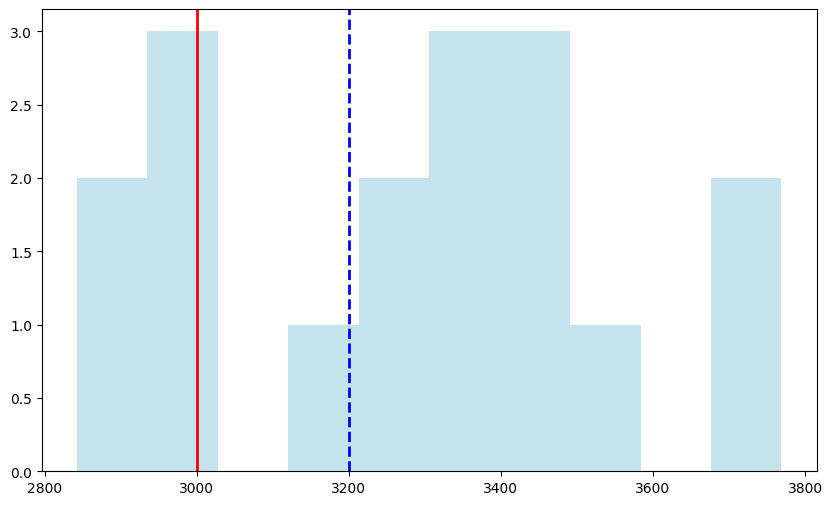

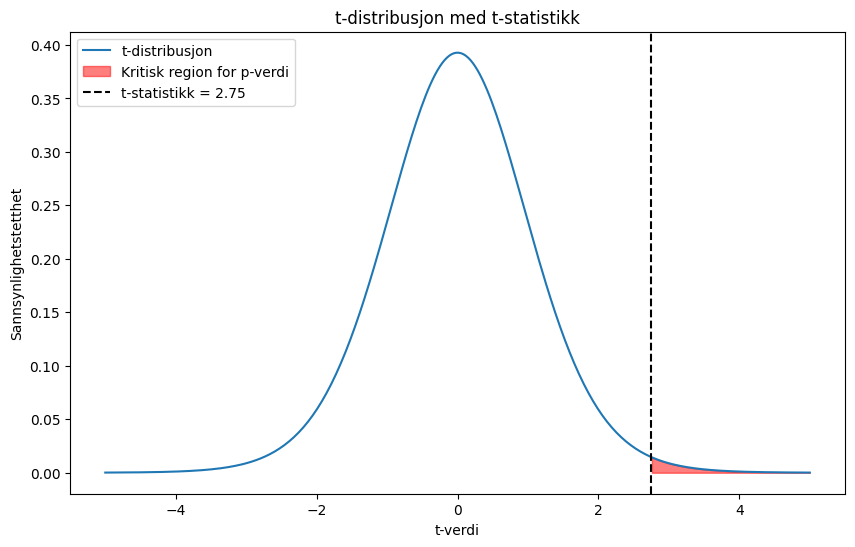

t-statistikk: 2.75
p-verdi: 0.0071
Vi forkaster nullhypotesen: Strømforbruket er statistisk signifikant høyere enn 3000 kilowattimer.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Definerte data
x_bar = 3200  # Gjennomsnittlig strømforbruk
s = 300       # Standardavvik
n = 17        # Antall husstander
mu_0 = 3000   # Nullhypotesens verdi for gjennomsnittlig strømforbruk

# Generer tilfeldige data for visualisering basert på angitte parametere
data = np.random.normal(x_bar, s, n)

# Histogram av dataene
plt.figure(figsize=(10, 6))
plt.hist(data, bins=10, color='lightblue', alpha=0.7, label='Strømforbruk Data')
plt.axvline(x_bar, color='blue', linestyle='dashed', linewidth=2, label=f'Gjennomsnitt: {x_bar} kWh')
plt.axvline(mu_0, color='red', linestyle='solid', linewidth=2, label=f'Nullhypotese (µ0 = {mu_0} kWh)')

# Beregning av t-statistikk og p-verdi
t_stat = (x_bar - mu_0) / (s / np.sqrt(n))
p_value = 1 - stats.t.cdf(t_stat, df=n-1)

# T-fordelingsplott for å vise t-statistikk
t_values = np.linspace(-5, 5, 300)
t_pdf = stats.t.pdf(t_values, df=n-1)
plt.figure(figsize=(10, 6))
plt.plot(t_values, t_pdf, label='t-distribusjon')
plt.fill_between(t_values, t_pdf, where=(t_values >= t_stat), color='red', alpha=0.5, label='Kritisk region for p-verdi')
plt.axvline(t_stat, color='black', linestyle='dashed', label=f't-statistikk = {t_stat:.2f}')
plt.title('t-distribusjon med t-statistikk')
plt.xlabel('t-verdi')
plt.ylabel('Sannsynlighetstetthet')
plt.legend()

# Vis alle plottene
plt.show()

print(f"t-statistikk: {t_stat:.2f}")
print(f"p-verdi: {p_value:.4f}")
if p_value < 0.05:
    print("Vi forkaster nullhypotesen: Strømforbruket er statistisk signifikant høyere enn 3000 kilowattimer.")
else:
    print("Vi forkaster ikke nullhypotesen: Det er ikke tilstrekkelig bevis for at strømforbruket er høyere enn 3000 kilowattimer.")
